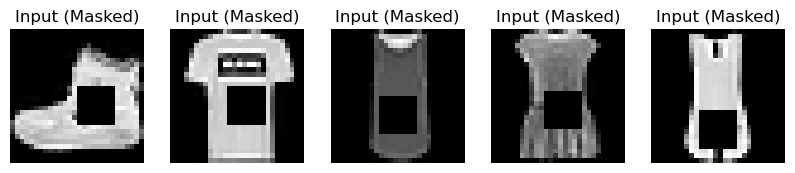

1/1 [==============================] - 0s 172ms/step
Epoch 1/150, Discriminator Loss: 0.7278933525085449, Generator Loss: 0.6908960342407227
1/1 [==============================] - 0s 28ms/step
Epoch 2/150, Discriminator Loss: 0.6604199409484863, Generator Loss: 0.685455322265625
1/1 [==============================] - 0s 39ms/step
Epoch 3/150, Discriminator Loss: 0.6170328855514526, Generator Loss: 0.679108202457428
1/1 [==============================] - 0s 37ms/step
Epoch 4/150, Discriminator Loss: 0.5830755233764648, Generator Loss: 0.6767963171005249
1/1 [==============================] - 0s 37ms/step
Epoch 5/150, Discriminator Loss: 0.5587694644927979, Generator Loss: 0.673146665096283
1/1 [==============================] - 0s 37ms/step
Epoch 6/150, Discriminator Loss: 0.546107828617096, Generator Loss: 0.6624810695648193
1/1 [==============================] - 0s 31ms/step
Epoch 7/150, Discriminator Loss: 0.5415530204772949, Generator Loss: 0.6678373217582703
1/1 [==================

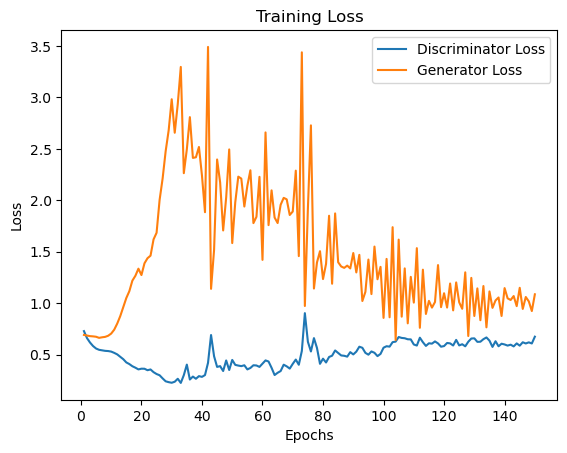

1/1 [==============================] - 0s 195ms/step


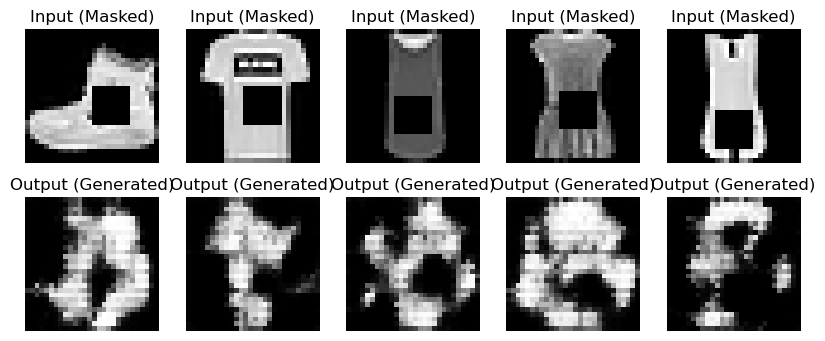

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU
from tensorflow.keras.optimizers import Adam

# Load Fashion MNIST dataset
(train_images, _), (_, _) = fashion_mnist.load_data()

# Normalize images to range [-1, 1]
train_images = (train_images - 127.5) / 127.5

# Add channel dimension
train_images = np.expand_dims(train_images, axis=-1)

# Mask some random central regions in images for inpainting
mask_value = -1.0
mask_size = 8
masked_images = np.copy(train_images)
for i in range(len(masked_images)):
    x = np.random.randint(10, 18)
    y = np.random.randint(10, 18)
    masked_images[i, x:x+mask_size, y:y+mask_size, :] = mask_value

# Visualize some masked images
n_samples = 5
plt.figure(figsize=(10, 4))
for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(masked_images[i, :, :, 0], cmap='gray')
    plt.title('Input (Masked)')
    plt.axis('off')
plt.show()

# Generator
generator = Sequential([
    Dense(7*7*64, input_shape=(100,)),
    Reshape((7, 7, 64)),
    Conv2DTranspose(32, kernel_size=3, strides=2, padding='same', activation='relu'),
    Conv2DTranspose(1, kernel_size=3, strides=2, padding='same', activation='tanh')
])

# Discriminator
discriminator = Sequential([
    Conv2D(32, kernel_size=3, strides=2, padding='same', input_shape=(28, 28, 1)),
    LeakyReLU(alpha=0.2),
    Conv2D(64, kernel_size=3, strides=2, padding='same'),
    LeakyReLU(alpha=0.2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

# Combined GAN model
discriminator.trainable = False
gan_input = Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Training parameters
batch_size = 32
epochs = 150

# Lists to store loss values
discriminator_losses = []
generator_losses = []

# Training loop
for epoch in range(epochs):
    # Sample random noise
    noise = np.random.normal(0, 1, (batch_size, 100))
    
    # Generate images
    generated_images = generator.predict(noise)
    
    # Select a random batch of real images
    real_images = masked_images[np.random.randint(0, masked_images.shape[0], batch_size)]
    
    # Concatenate real images with generated images
    X = np.concatenate([real_images, generated_images])
    
    # Labels for generated and real images
    y_dis = np.zeros(2*batch_size)
    y_dis[:batch_size] = 0.9  # Label smoothing
    
    # Train discriminator
    discriminator_loss = discriminator.train_on_batch(X, y_dis)
    discriminator_losses.append(discriminator_loss[0])
    
    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    y_gen = np.ones(batch_size)
    generator_loss = gan.train_on_batch(noise, y_gen)
    generator_losses.append(generator_loss)
    
    # Print progress
    print(f'Epoch {epoch+1}/{epochs}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}')

# Plot loss curves
plt.plot(range(1, epochs+1), discriminator_losses, label='Discriminator Loss')
plt.plot(range(1, epochs+1), generator_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()

# Generate and visualize images
n_samples = 5
noise = np.random.normal(0, 1, (n_samples, 100))
generated_images = generator.predict(noise)

plt.figure(figsize=(10, 4))
for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(masked_images[i, :, :, 0], cmap='gray')
    plt.title('Input (Masked)')
    plt.axis('off')
    plt.subplot(2, n_samples, n_samples + i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.title('Output (Generated)')
    plt.axis('off')
plt.show()


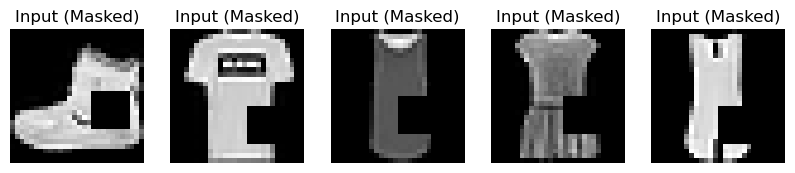

1/1 [==============================] - 0s 261ms/step
Epoch 1/120, Discriminator Loss: 0.6885669231414795, Generator Loss: 0.689276933670044
1/1 [==============================] - 0s 42ms/step
Epoch 2/120, Discriminator Loss: 0.6108665466308594, Generator Loss: 0.6476490497589111
1/1 [==============================] - 0s 47ms/step
Epoch 3/120, Discriminator Loss: 0.6023906469345093, Generator Loss: 0.5863142013549805
1/1 [==============================] - 0s 46ms/step
Epoch 4/120, Discriminator Loss: 0.6366035342216492, Generator Loss: 0.5849912166595459
1/1 [==============================] - 0s 52ms/step
Epoch 5/120, Discriminator Loss: 0.6425905227661133, Generator Loss: 0.6709306836128235
1/1 [==============================] - 0s 52ms/step
Epoch 6/120, Discriminator Loss: 0.5836503505706787, Generator Loss: 0.7948222756385803
1/1 [==============================] - 0s 45ms/step
Epoch 7/120, Discriminator Loss: 0.5368236303329468, Generator Loss: 0.9332225322723389
1/1 [===============

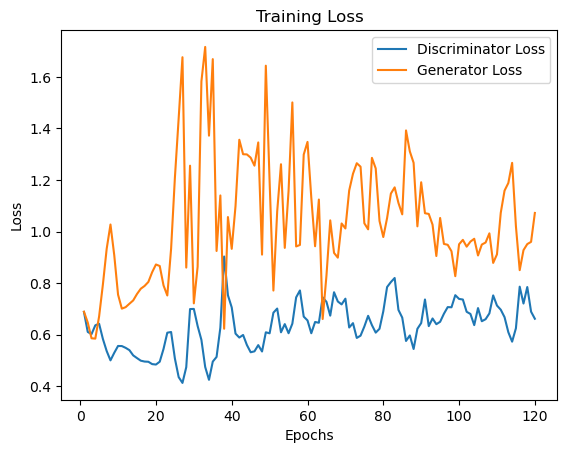

1/1 [==============================] - 0s 342ms/step


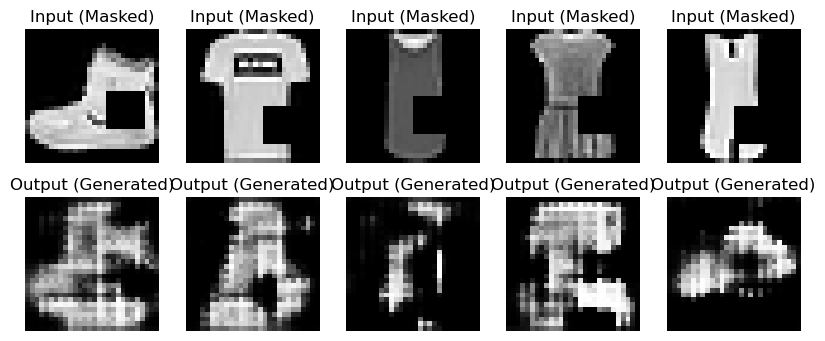

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam

# Load Fashion MNIST dataset
(train_images, _), (_, _) = fashion_mnist.load_data()

# Normalize images to range [-1, 1]
train_images = (train_images - 127.5) / 127.5

# Add channel dimension
train_images = np.expand_dims(train_images, axis=-1)

# Mask some random central regions in images for inpainting
mask_value = -1.0
mask_size = 8
masked_images = np.copy(train_images)
for i in range(len(masked_images)):
    x = np.random.randint(10, 18)
    y = np.random.randint(10, 18)
    masked_images[i, x:x+mask_size, y:y+mask_size, :] = mask_value

# Visualize some masked images
n_samples = 5
plt.figure(figsize=(10, 4))
for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(masked_images[i, :, :, 0], cmap='gray')
    plt.title('Input (Masked)')
    plt.axis('off')
plt.show()

# Generator
generator = Sequential([
    Dense(7*7*128, input_shape=(100,)),
    Reshape((7, 7, 128)),
    Conv2DTranspose(64, kernel_size=5, strides=2, padding='same', activation='relu'),
    Conv2DTranspose(32, kernel_size=5, strides=2, padding='same', activation='relu'),
    Conv2DTranspose(1, kernel_size=5, strides=1, padding='same', activation='tanh')
])

# Discriminator
discriminator = Sequential([
    Conv2D(32, kernel_size=5, strides=2, padding='same', input_shape=(28, 28, 1)),
    LeakyReLU(alpha=0.2),
    Dropout(0.25),
    Conv2D(64, kernel_size=5, strides=2, padding='same'),
    LeakyReLU(alpha=0.2),
    Dropout(0.25),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

# Combined GAN model
discriminator.trainable = False
gan_input = Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Training parameters
batch_size = 32
epochs = 120

# Lists to store loss values
discriminator_losses = []
generator_losses = []

# Training loop
for epoch in range(epochs):
    # Sample random noise
    noise = np.random.normal(0, 1, (batch_size, 100))
    
    # Generate images
    generated_images = generator.predict(noise)
    
    # Select a random batch of real images
    real_images = masked_images[np.random.randint(0, masked_images.shape[0], batch_size)]
    
    # Concatenate real images with generated images
    X = np.concatenate([real_images, generated_images])
    
    # Labels for generated and real images
    y_dis = np.zeros(2*batch_size)
    y_dis[:batch_size] = 0.9  # Label smoothing
    
    # Train discriminator
    discriminator_loss = discriminator.train_on_batch(X, y_dis)
    discriminator_losses.append(discriminator_loss[0])
    
    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    y_gen = np.ones(batch_size)
    generator_loss = gan.train_on_batch(noise, y_gen)
    generator_losses.append(generator_loss)
    
    # Print progress
    print(f'Epoch {epoch+1}/{epochs}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}')

# Plot loss curves
plt.plot(range(1, epochs+1), discriminator_losses, label='Discriminator Loss')
plt.plot(range(1, epochs+1), generator_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()

# Generate and visualize images
n_samples = 5
noise = np.random.normal(0, 1, (n_samples, 100))
generated_images = generator.predict(noise)

plt.figure(figsize=(10, 4))
for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(masked_images[i, :, :, 0], cmap='gray')
    plt.title('Input (Masked)')
    plt.axis('off')
    plt.subplot(2, n_samples, n_samples + i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.title('Output (Generated)')
    plt.axis('off')
plt.show()


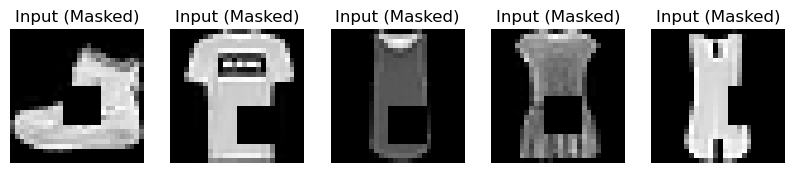

Generator Output Shape: (None, 28, 28, 1)
Discriminator Input Shape: (None, 28, 28, 1)
2/2 [==============================] - 0s 37ms/step
Epoch 1/150, Discriminator Loss: 0.7746285200119019, Generator Loss: 0.6847635507583618
2/2 [==============================] - 0s 38ms/step
Epoch 2/150, Discriminator Loss: 0.6462506651878357, Generator Loss: 0.5545715689659119
2/2 [==============================] - 0s 34ms/step
Epoch 3/150, Discriminator Loss: 0.8312952518463135, Generator Loss: 0.5795937180519104
2/2 [==============================] - 0s 42ms/step
Epoch 4/150, Discriminator Loss: 0.7385364174842834, Generator Loss: 1.0087802410125732
2/2 [==============================] - 0s 42ms/step
Epoch 5/150, Discriminator Loss: 0.5737519264221191, Generator Loss: 0.9605068564414978
2/2 [==============================] - 0s 41ms/step
Epoch 6/150, Discriminator Loss: 0.6704111099243164, Generator Loss: 0.6874728202819824
2/2 [==============================] - 0s 33ms/step
Epoch 7/150, Discrimi

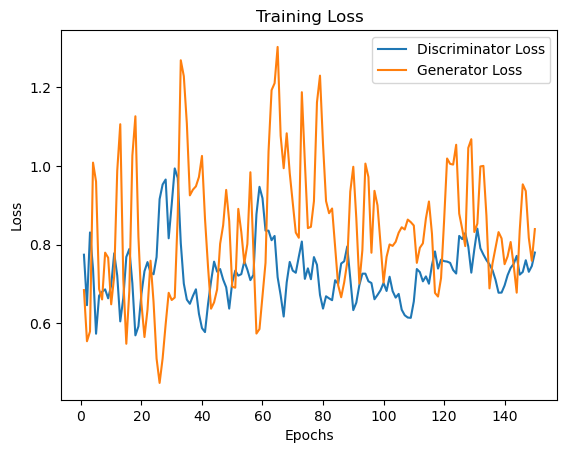

1/1 [==============================] - 0s 370ms/step


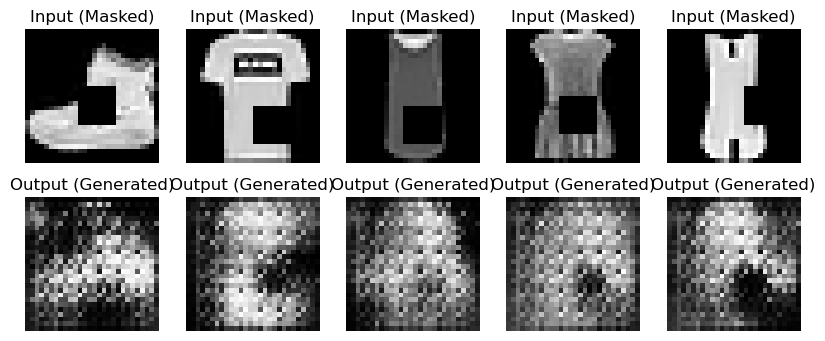

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

# Load Fashion MNIST dataset
(train_images, _), (_, _) = fashion_mnist.load_data()

# Normalize images to range [-1, 1]
train_images = (train_images - 127.5) / 127.5

# Add channel dimension
train_images = np.expand_dims(train_images, axis=-1)

# Mask some random central regions in images for inpainting
mask_value = -1.0
mask_size = 8
masked_images = np.copy(train_images)
for i in range(len(masked_images)):
    x = np.random.randint(10, 18)
    y = np.random.randint(10, 18)
    masked_images[i, x:x+mask_size, y:y+mask_size, :] = mask_value

# Visualize some masked images
n_samples = 5
plt.figure(figsize=(10, 4))
for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(masked_images[i, :, :, 0], cmap='gray')
    plt.title('Input (Masked)')
    plt.axis('off')
plt.show()

# Generator
generator = Sequential([
    Dense(7*7*256, input_shape=(100,)),
    Reshape((7, 7, 256)),
    Conv2DTranspose(128, kernel_size=5, strides=1, padding='same', activation='relu'),
    Conv2DTranspose(64, kernel_size=5, strides=2, padding='same', activation='relu'),
    Conv2DTranspose(32, kernel_size=5, strides=1, padding='same', activation='relu'),  # Adjust stride
    Conv2DTranspose(1, kernel_size=5, strides=2, padding='same', activation='tanh')
])


# Print generator output shape
print("Generator Output Shape:", generator.output_shape)

# Discriminator
discriminator = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128),
    LeakyReLU(alpha=0.2),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Print discriminator input shape
print("Discriminator Input Shape:", discriminator.input_shape)

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

# Combined GAN model
discriminator.trainable = False
gan_input = Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Training parameters
batch_size = 64
epochs = 150

# Lists to store loss values
discriminator_losses = []
generator_losses = []

# Training loop
for epoch in range(epochs):
    # Sample random noise
    noise = np.random.normal(0, 1, (batch_size, 100))
    
    # Generate images
    generated_images = generator.predict(noise)
    
    # Select a random batch of real images
    real_images = masked_images[np.random.randint(0, masked_images.shape[0], batch_size)]
    
    # Concatenate real images with generated images
    X = np.concatenate([real_images, generated_images])
    
    # Labels for generated and real images
    y_dis = np.zeros(2*batch_size)
    y_dis[:batch_size] = 0.9  # Label smoothing
    
    # Train discriminator
    discriminator_loss = discriminator.train_on_batch(X, y_dis)
    discriminator_losses.append(discriminator_loss[0])
    
    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    y_gen = np.ones(batch_size)
    generator_loss = gan.train_on_batch(noise, y_gen)
    generator_losses.append(generator_loss)
    
    # Print progress
    print(f'Epoch {epoch+1}/{epochs}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}')

# Plot loss curves
plt.plot(range(1, epochs+1), discriminator_losses, label='Discriminator Loss')
plt.plot(range(1, epochs+1), generator_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()

# Generate and visualize images
n_samples = 5
noise = np.random.normal(0, 1, (n_samples, 100))
generated_images = generator.predict(noise)

plt.figure(figsize=(10, 4))
for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(masked_images[i, :, :, 0], cmap='gray')
    plt.title('Input (Masked)')
    plt.axis('off')
    plt.subplot(2, n_samples, n_samples + i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.title('Output (Generated)')
    plt.axis('off')
plt.show()


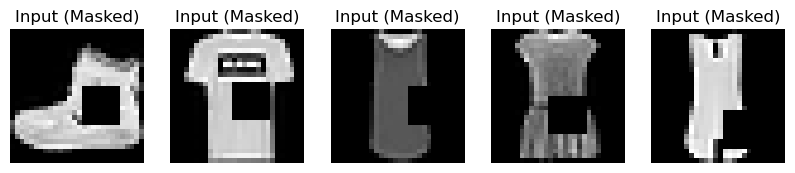

Discriminator Input Shape: (None, 28, 28, 1)
2/2 [==============================] - 0s 41ms/step
Epoch 1/150, Discriminator Loss: 0.7315276265144348, Generator Loss: 0.6898825764656067
2/2 [==============================] - 0s 38ms/step
Epoch 2/150, Discriminator Loss: 0.2951214015483856, Generator Loss: 0.2911003530025482
2/2 [==============================] - 0s 39ms/step
Epoch 3/150, Discriminator Loss: 0.28829994797706604, Generator Loss: 0.07538974285125732
2/2 [==============================] - 0s 42ms/step
Epoch 4/150, Discriminator Loss: 0.29986876249313354, Generator Loss: 0.07769031822681427
2/2 [==============================] - 0s 40ms/step
Epoch 5/150, Discriminator Loss: 0.2802390158176422, Generator Loss: 0.03058542124927044
2/2 [==============================] - 0s 41ms/step
Epoch 6/150, Discriminator Loss: 0.2568737864494324, Generator Loss: 0.01677628606557846
2/2 [==============================] - 0s 40ms/step
Epoch 7/150, Discriminator Loss: 0.22815242409706116, Gen

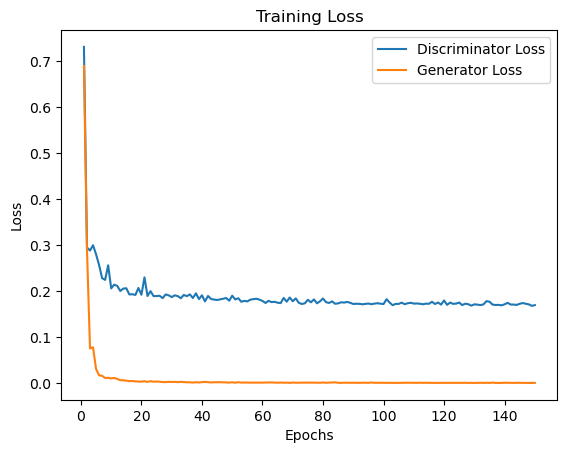

1/1 [==============================] - 1s 1s/step


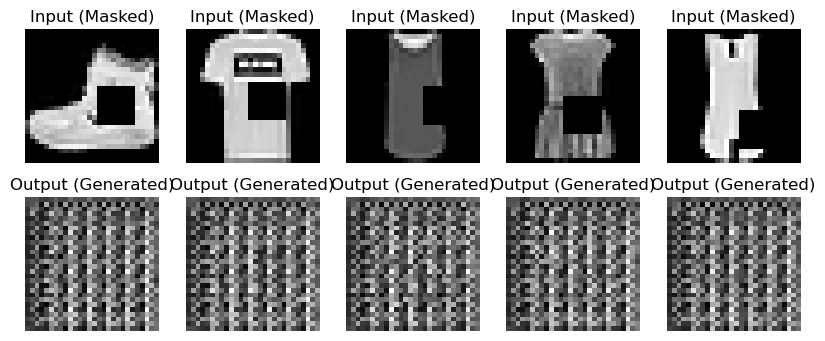

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

# Load Fashion MNIST dataset
(train_images, _), (_, _) = fashion_mnist.load_data()

# Normalize images to range [-1, 1]
train_images = (train_images - 127.5) / 127.5

# Add channel dimension
train_images = np.expand_dims(train_images, axis=-1)

# Mask some random central regions in images for inpainting
mask_value = -1.0
mask_size = 8
masked_images = np.copy(train_images)
for i in range(len(masked_images)):
    x = np.random.randint(10, 18)
    y = np.random.randint(10, 18)
    masked_images[i, x:x+mask_size, y:y+mask_size, :] = mask_value

# Visualize some masked images
n_samples = 5
plt.figure(figsize=(10, 4))
for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(masked_images[i, :, :, 0], cmap='gray')
    plt.title('Input (Masked)')
    plt.axis('off')
plt.show()

# Generator
generator = Sequential([
    Dense(7*7*256, input_shape=(100,)),
    Reshape((7, 7, 256)),
    BatchNormalization(),  # Add batch normalization layer
    Conv2DTranspose(128, kernel_size=5, strides=1, padding='same', activation='relu'),
    BatchNormalization(),  # Add batch normalization layer
    Conv2DTranspose(64, kernel_size=5, strides=2, padding='same', activation='relu'),
    BatchNormalization(),  # Add batch normalization layer
    Conv2DTranspose(32, kernel_size=5, strides=1, padding='same', activation='relu'),
    BatchNormalization(),  # Add batch normalization layer
    Conv2DTranspose(1, kernel_size=5, strides=2, padding='same', activation='tanh')
])

# Discriminator
discriminator = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    BatchNormalization(),  # Add batch normalization layer
    Dense(128),
    LeakyReLU(alpha=0.2),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Print discriminator input shape
print("Discriminator Input Shape:", discriminator.input_shape)

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

# Combined GAN model
discriminator.trainable = False
gan_input = Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Training parameters
batch_size = 64
epochs = 150

# Lists to store loss values
discriminator_losses = []
generator_losses = []

# Training loop
for epoch in range(epochs):
    # Sample random noise
    noise = np.random.normal(0, 1, (batch_size, 100))
    
    # Generate images
    generated_images = generator.predict(noise)
    
    # Select a random batch of real images
    real_images = masked_images[np.random.randint(0, masked_images.shape[0], batch_size)]
    
    # Concatenate real images with generated images
    X = np.concatenate([real_images, generated_images])
    
    # Labels for generated and real images
    y_dis = np.zeros(2*batch_size)
    y_dis[:batch_size] = 0.9  # Label smoothing
    
    # Train discriminator
    discriminator_loss = discriminator.train_on_batch(X, y_dis)
    discriminator_losses.append(discriminator_loss[0])
    
    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    y_gen = np.ones(batch_size)
    generator_loss = gan.train_on_batch(noise, y_gen)
    generator_losses.append(generator_loss)
    
    # Print progress
    print(f'Epoch {epoch+1}/{epochs}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}')

# Plot loss curves
plt.plot(range(1, epochs+1), discriminator_losses, label='Discriminator Loss')
plt.plot(range(1, epochs+1), generator_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()

# Generate and visualize images
n_samples = 5
noise = np.random.normal(0, 1, (n_samples, 100))
generated_images = generator.predict(noise)

plt.figure(figsize=(10, 4))
for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(masked_images[i, :, :, 0], cmap='gray')
    plt.title('Input (Masked)')
    plt.axis('off')
    plt.subplot(2, n_samples, n_samples + i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.title('Output (Generated)')
    plt.axis('off')
plt.show()


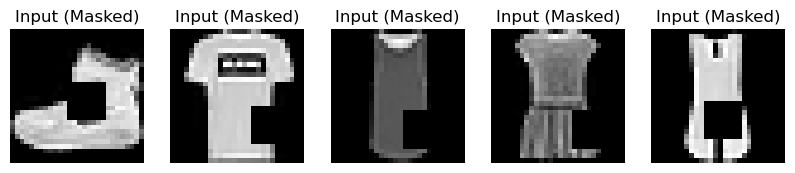

Discriminator Input Shape: (None, 28, 28, 1)
2/2 [==============================] - 0s 40ms/step
Epoch 1/150, Discriminator Loss: 0.9882335066795349, Generator Loss: 0.7792948484420776
2/2 [==============================] - 0s 36ms/step
Epoch 2/150, Discriminator Loss: 0.31636595726013184, Generator Loss: 0.4259079694747925
2/2 [==============================] - 0s 36ms/step
Epoch 3/150, Discriminator Loss: 0.29998624324798584, Generator Loss: 0.14396452903747559
2/2 [==============================] - 0s 39ms/step
Epoch 4/150, Discriminator Loss: 0.2834948003292084, Generator Loss: 0.07690568268299103
2/2 [==============================] - 0s 38ms/step
Epoch 5/150, Discriminator Loss: 0.24634525179862976, Generator Loss: 0.04477843642234802
2/2 [==============================] - 0s 41ms/step
Epoch 6/150, Discriminator Loss: 0.2158961296081543, Generator Loss: 0.05906011909246445
2/2 [==============================] - 0s 37ms/step
Epoch 7/150, Discriminator Loss: 0.23051655292510986, Ge

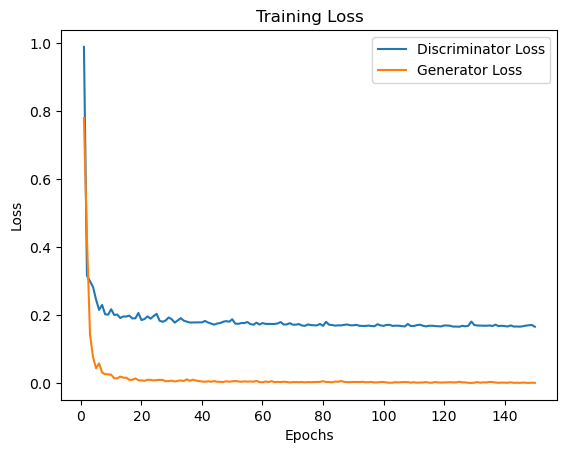

1/1 [==============================] - 0s 492ms/step


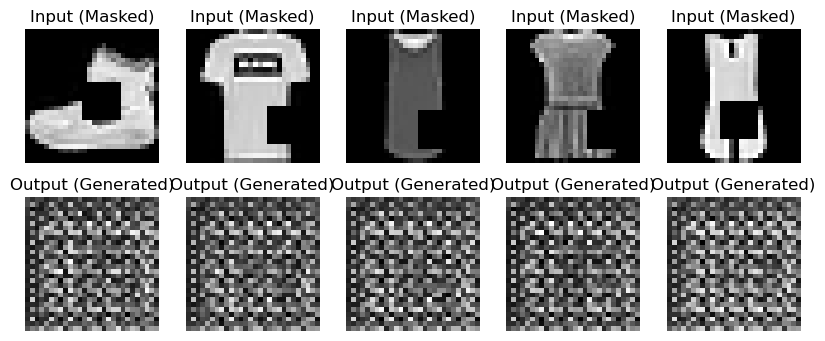

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load Fashion MNIST dataset
(train_images, _), (_, _) = fashion_mnist.load_data()

# Normalize images to range [-1, 1]
train_images = (train_images - 127.5) / 127.5

# Add channel dimension
train_images = np.expand_dims(train_images, axis=-1)

# Mask some random central regions in images for inpainting
mask_value = -1.0
mask_size = 8
masked_images = np.copy(train_images)
for i in range(len(masked_images)):
    x = np.random.randint(10, 18)
    y = np.random.randint(10, 18)
    masked_images[i, x:x+mask_size, y:y+mask_size, :] = mask_value

# Visualize some masked images
n_samples = 5
plt.figure(figsize=(10, 4))
for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(masked_images[i, :, :, 0], cmap='gray')
    plt.title('Input (Masked)')
    plt.axis('off')
plt.show()

# Generator
generator = Sequential([
    Dense(7*7*256, input_shape=(100,)),
    Reshape((7, 7, 256)),
    BatchNormalization(),  # Add batch normalization layer
    Conv2DTranspose(128, kernel_size=5, strides=1, padding='same', activation='relu'),
    BatchNormalization(),  # Add batch normalization layer
    Conv2DTranspose(64, kernel_size=5, strides=2, padding='same', activation='relu'),
    BatchNormalization(),  # Add batch normalization layer
    Conv2DTranspose(32, kernel_size=5, strides=1, padding='same', activation='relu'),
    BatchNormalization(),  # Add batch normalization layer
    Conv2DTranspose(1, kernel_size=5, strides=2, padding='same', activation='tanh')
])

# Discriminator
discriminator = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    BatchNormalization(),  # Add batch normalization layer
    Dense(256),  # Increase discriminator capacity
    LeakyReLU(alpha=0.2),
    Dropout(0.5),  # Adjust dropout rate
    Dense(128),
    LeakyReLU(alpha=0.2),
    Dense(1, activation='sigmoid')
])

# Print discriminator input shape
print("Discriminator Input Shape:", discriminator.input_shape)

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Combined GAN model
discriminator.trainable = False
gan_input = Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Training parameters
batch_size = 64
epochs = 150

# Lists to store loss values
discriminator_losses = []
generator_losses = []

# Training loop
for epoch in range(epochs):
    # Sample random noise
    noise = np.random.normal(0, 1, (batch_size, 100))
    
    # Generate images
    generated_images = generator.predict(noise)
    
    # Select a random batch of real images
    real_images = masked_images[np.random.randint(0, masked_images.shape[0], batch_size)]
    
    # Concatenate real images with generated images
    X = np.concatenate([real_images, generated_images])
    
    # Labels for generated and real images
    y_dis = np.zeros(2*batch_size)
    y_dis[:batch_size] = 0.9  # Label smoothing
    
    # Train discriminator
    discriminator_loss = discriminator.train_on_batch(X, y_dis)
    discriminator_losses.append(discriminator_loss[0])
    
    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    y_gen = np.ones(batch_size)
    generator_loss = gan.train_on_batch(noise, y_gen)
    generator_losses.append(generator_loss)
    
    # Print progress
    print(f'Epoch {epoch+1}/{epochs}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}')

# Plot loss curves
plt.plot(range(1, epochs+1), discriminator_losses, label='Discriminator Loss')
plt.plot(range(1, epochs+1), generator_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()

# Generate and visualize images
n_samples = 5
noise = np.random.normal(0, 1, (n_samples, 100))
generated_images = generator.predict(noise)

plt.figure(figsize=(10, 4))
for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(masked_images[i, :, :, 0], cmap='gray')
    plt.title('Input (Masked)')
    plt.axis('off')
    plt.subplot(2, n_samples, n_samples + i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.title('Output (Generated)')
    plt.axis('off')
plt.show()
